# Clasificacion de Agua Potable 
## Proyecto Final - Data Science - CoderHouse - 2021


# Introducción
Con el fin de presentar el trabajo final se nos solicito seleccionemos un dataset para ir aplicando los distintos conocimientos que se fueron brindando a lo largo del curso segun las consignas indicadas en la plataforma. El dataset elegido se encuentra publicado en el sitio https://www.kaggle.com/ referencia: https://www.kaggle.com/adityakadiwal/water-potability


# Objetivo
El objetivo es poder estimar la potabilidad del agua. La naturaleza del problema sera encuadrado como un proceso donde se aplicara un modelo de clasificación conforme a las variables de entradas PH, Hardness, Solid, Chloramines, Sulfate, Conductivity, organic carbon, trihalomethanes, turbidity predeciremos el resultado de la potabilidad que sera la variable target. 

## Contexto
El acceso al agua potable es esencial para la salud, un derecho humano básico y un componente de una política eficaz de protección de la salud. Esto es importante como cuestión de salud y desarrollo a nivel nacional, regional y local. En algunas regiones, se ha demostrado que las inversiones en abastecimiento de agua y saneamiento pueden producir un beneficio económico neto, ya que las reducciones de los efectos adversos para la salud y los costos de atención de la salud superan los costos de realizar las intervenciones.

## Contenido
El archivo water_potability.csv contiene métricas de calidad del agua para 3276 cuerpos de agua diferentes.

## Referencias sobre las features
### PH
El pH del agua es una métrica importante para determinar su equilibrio ácido-base. También se puede utilizar para determinar si el agua es ácida o alcalina. El límite máximo permitido de pH ha sido establecido en 6.5 a 8.5 por la OMS.

### Hardness (Dureza)
Se denomina dureza del agua a la concentración de compuestos minerales que hay en una determinada cantidad de agua, en particular sales de magnesio y calcio.

No se ha establecido límite para este parámetro ya que la Organización Mundial de la Salud determina que tanto si la dureza del agua es alta o está en valores bajos no se produce ningún efecto pernicioso para la salud de las personas.

### Solid (Solidos)
Potasio, calcio, sodio, bicarbonatos, cloruros, magnesio, sulfatos y otros minerales o sales inorgánicos y orgánicos pueden disolverse en agua. Este es un criterio importante para el uso del agua. La presencia de un alto valor de TDS en el agua sugiere que está muy mineralizada. El límite deseable para TDS es 500 mg/l y el límite máximo es 1000 mg/l.

### Chloramines
Los principales desinfectantes utilizados en los sistemas públicos de agua son el cloro y la cloramina. Cuando se agrega amoníaco al cloro para purificar el agua potable, se generan cloraminas. Los niveles de cloro en el agua potable de hasta 4 miligramos por litro (mg / L o 4 partes por millón (ppm)) se consideran seguros.

### Sulfate
El nivel máximo de sulfato sugerido por la Organización Mundial de la Salud (OMS) en las Guías para la calidad del agua potable es de 500 mg/l. Las normas de la UE son más completas y estrictas que la OMS, lo que sugiere un máximo de 250 mg/l de sulfato en el agua destinada al consumo humano.

### Conductivity
El agua pura es un buen aislante en lugar de un buen conductor de corriente eléctrica. La conductividad eléctrica del agua mejora a medida que aumenta la concentración de iones. La conductividad eléctrica del agua suele estar determinada por la cantidad de partículas disueltas en ella. La conductividad eléctrica (CE) es una medida del proceso iónico de una solución, que le permite transmitir corriente.

Las aguas potables de mejor calidad tienen una conductividad de 50-500 mmhos/cm, pero algunas pueden tener valores de hasta 1.000-1.500 mmhos/cm.

### Organic_carbon
El carbono orgánico total (COT) en las fuentes de agua proviene de la materia orgánica natural en descomposición (NOM), así como de fuentes sintéticas. TOC es una medida de la cantidad total de carbono en compuestos orgánicos en agua pura.

### Trihalomethanes
Los THM son compuestos que se pueden encontrar en el agua tratada con cloro. Los niveles de THM en el agua potable varían según la cantidad de materia orgánica en el agua, la cantidad de cloro necesaria para tratar el agua y la temperatura del agua que se está tratando. Los niveles de THM en el agua potable de hasta 80 ppm se consideran seguros.

### Turbidity
La cantidad de materia sólida en estado suspendido determina la turbidez del agua. Es una prueba que determina la calidad de la descarga de residuos en términos de materia coloidal midiendo las propiedades emisoras de luz del agua. El valor recomendado por la OMS de 5,00 NTU.


# Preprocesamiento de Datos

Comenzamos con la importación de librerias de uso y la lectura del dataset.

In [391]:
# Importamos las libreria de uso
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [392]:
# Importamos el dataset a un Dataframe de Pandas
df = pd.read_csv('./water_potability.csv')
# Examinamos una muestra del dataset
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

A simple vista ya se observa en el head la falta de datos dentro del dataset por consiguiente exploraremos en profundidad para ver la cantidad de faltantes y disponer de que forma tratar esos datos.

In [393]:
#Empecemos viendo el shape de nuestro dataframe
df.shape

(3276, 10)

In [394]:
#imprimimos la cantidad y tipos de datos de cada columna del dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [395]:
#Contabilizamos los datos nulos por columna
df.isnull().sum() 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Al detectar la cantidad de 491 datos faltantes dentro de Ph, 781 dentro de Sulfate y 162 en Trihalomethanes resolvemos asigar a este grupo de campos la media para dejar completo el dataset sin datos missings.


In [396]:
# Completamos valores faltantas de todas las columnas con la mediana correspondiente
columnas = df.columns  # lista de todas las columnas
cnum = set(columnas) 
for c in cnum:
    m = df[c].median()
    print(c, m)
    df[c] = df[c].fillna(m)

Turbidity 3.955027562993039
Organic_carbon 14.218337937208588
Solids 20927.833606520187
Chloramines 7.130298973883081
Hardness 196.96762686363076
Sulfate 333.073545745888
Potability 0.0
Conductivity 421.8849682800544
ph 7.036752103833548
Trihalomethanes 66.62248509808484


In [397]:
#Contabilizamos los datos nulos por columna
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [398]:
#Vuelvo a examinar el dataFrame
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [399]:
#Observamos las principales Estadisticas para el conjunto de datos
df.describe().round(2)

ph  Hardness    Solids  Chloramines  Sulfate  Conductivity  \
count  3276.00   3276.00   3276.00      3276.00  3276.00       3276.00   
mean      7.07    196.37  22014.09         7.12   333.61        426.21   
std       1.47     32.88   8768.57         1.58    36.14         80.82   
min       0.00     47.43    320.94         0.35   129.00        181.48   
25%       6.28    176.85  15666.69         6.13   317.09        365.73   
50%       7.04    196.97  20927.83         7.13   333.07        421.88   
75%       7.87    216.67  27332.76         8.11   350.39        481.79   
max      14.00    323.12  61227.20        13.13   481.03        753.34   

       Organic_carbon  Trihalomethanes  Turbidity  Potability  
count         3276.00          3276.00    3276.00     3276.00  
mean            14.28            66.41       3.97        0.39  
std              3.31            15.77       0.78        0.49  
min              2.20             0.74       1.45        0.00  
25%             12.07            56.65       3.44        0.00  
50%             14.22            66.62       3.96        0.00  
75%             16.56            76.67       4.50        1.00  
max             28.30           124.00       6.74        1.00

**Resumen de los datos:**
Contamos con 3276 observaciones y 9 variables. También resulta importa mencionar, que a partir de la asignación de la media a los valores NAN no tenemos valores missings en nuestro dataset.

# Analisis univariado

## Potability

Analisamos nuestara veriable targuet:

<AxesSubplot:xlabel='Potability', ylabel='count'>

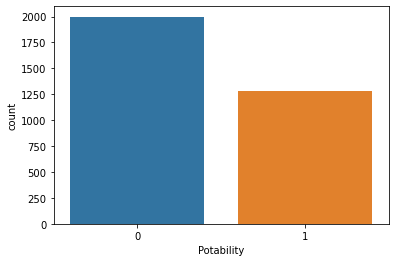

In [400]:
sns.countplot(x='Potability', data=df) # verificamos el balanceo de las muestras

<AxesSubplot:ylabel='Potability'>

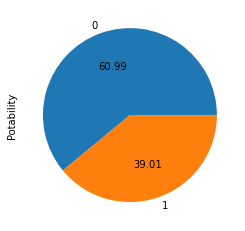

In [401]:
df['Potability'].value_counts().plot.pie(autopct='%.2f')

Observamos que el Dataset se encuentra levemente desbalanceado

<ipython-input-402-78453812b1f9>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  x_data.hist(ax=axes)


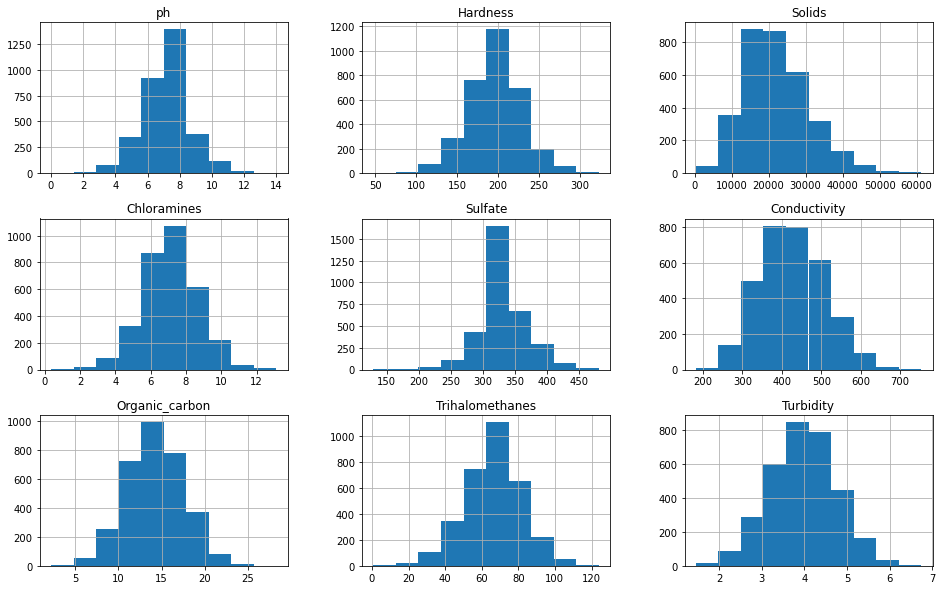

In [402]:
# Graficomos la distribucion de las variables de entrada  
fig = plt.figure(figsize = (16,10))
x_data = df.drop("Potability", axis=1)
axes = fig.gca()
x_data.hist(ax=axes)
plt.show();

A continuación realizaremos un analisis de cada una de estas variables en funcion de los parametros de permisibilidad definidos para el agua potable.  Pero primero buscaremos y limpiaremos outliers que pudieran afectar nuestro futuro modelo.

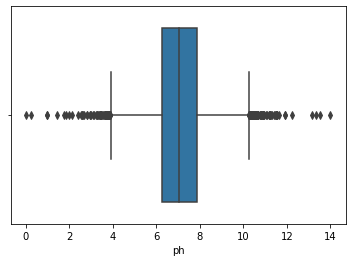

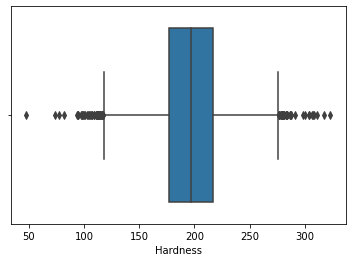

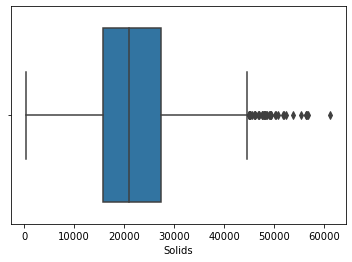

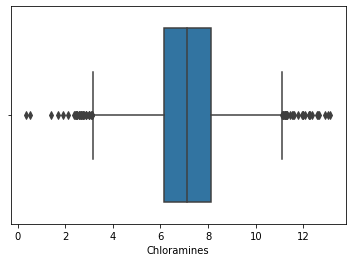

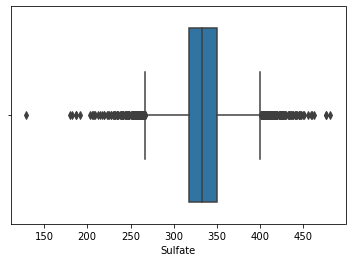

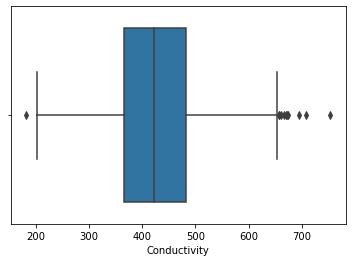

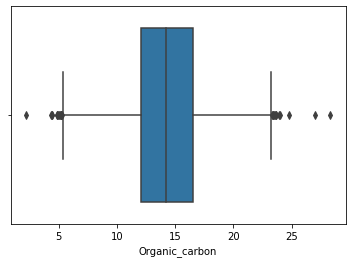

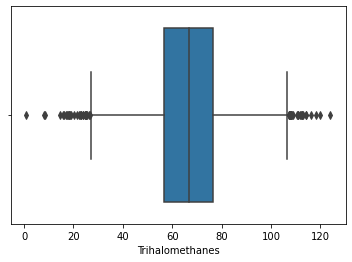

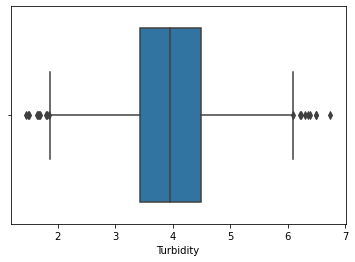

In [403]:
# Buscamos Outliers

for column in x_data:
    sns.boxplot(x=column, data=df)
    plt.show()

ph
Outliers:  142
% Outliers:  0.043345543345543344
ph
Outliers:  51
% Outliers:  0.016273133375877474
ph
Outliers:  9
% Outliers:  0.0029192345118391177
ph
Outliers:  5
% Outliers:  0.0016265452179570592
ph
Outliers:  1
% Outliers:  0.00032583903551645487
ph
Outliers:  0
% Outliers:  0.0


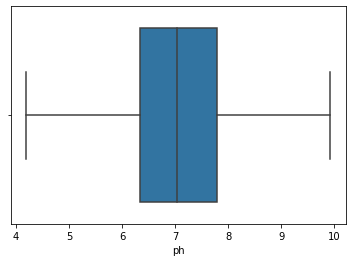

Hardness
Outliers:  66
% Outliers:  0.02151238591916558
Hardness
Outliers:  24
% Outliers:  0.007994670219853431
Hardness
Outliers:  3
% Outliers:  0.0010073875083948958
Hardness
Outliers:  0
% Outliers:  0.0


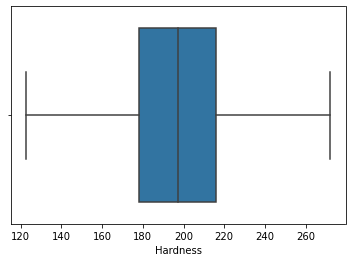

Solids
Outliers:  39
% Outliers:  0.01310924369747899
Solids
Outliers:  5
% Outliers:  0.0017029972752043597
Solids
Outliers:  1
% Outliers:  0.000341180484476288
Solids
Outliers:  0
% Outliers:  0.0


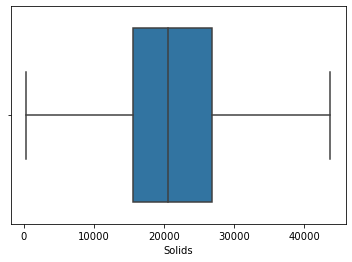

Chloramines
Outliers:  50
% Outliers:  0.017064846416382253
Chloramines
Outliers:  3
% Outliers:  0.0010416666666666667
Chloramines
Outliers:  2
% Outliers:  0.0006951685783802572
Chloramines
Outliers:  0
% Outliers:  0.0


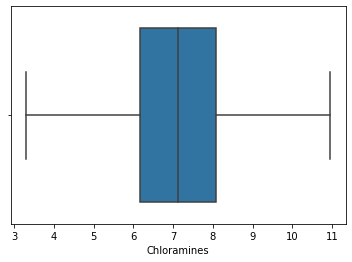

Sulfate
Outliers:  224
% Outliers:  0.07791304347826086


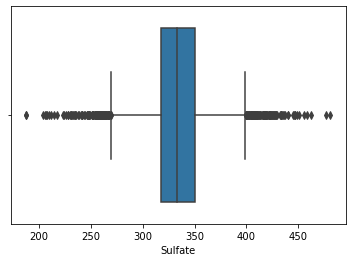

Conductivity
Outliers:  8
% Outliers:  0.002782608695652174
Conductivity
Outliers:  0
% Outliers:  0.0


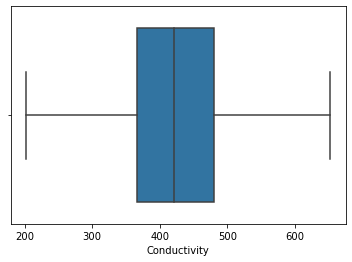

Organic_carbon
Outliers:  20
% Outliers:  0.006975933031042902
Organic_carbon
Outliers:  2
% Outliers:  0.0007024938531787847
Organic_carbon
Outliers:  0
% Outliers:  0.0


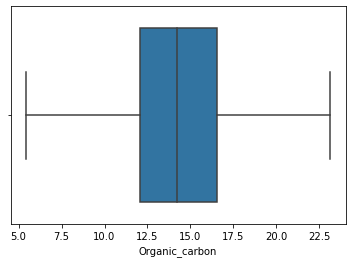

Trihalomethanes
Outliers:  42
% Outliers:  0.01476274165202109
Trihalomethanes
Outliers:  7
% Outliers:  0.0024973242953977882
Trihalomethanes
Outliers:  0
% Outliers:  0.0


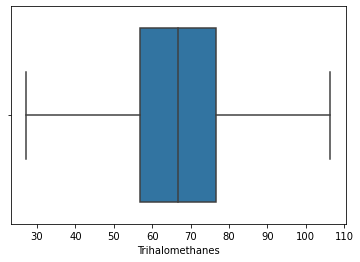

Turbidity
Outliers:  17
% Outliers:  0.006080114449213162
Turbidity
Outliers:  0
% Outliers:  0.0


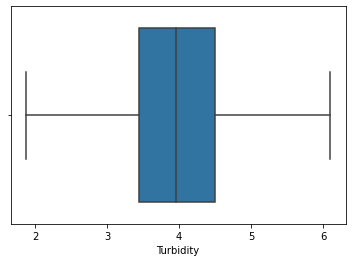

Se eliminaron  497  registros. Se conservan: 2779


In [404]:
# Todas las variables presentan outliers. 

# Vamos a crear una funcion para limpiar estos outliers

# la siguiente funcion elimina los outliare de manera recursiva mientras los mismos no representan mas del 5% de la muestra. 
# Si los outliers encontados por el metodo intercuadratico representan mas del 5% los consideramos valores tipicos.    

def clean_outliers(df, feauter):
    data_clean = df
    Q1 = data_clean[feauter].quantile (q = .25)
    Q3 = data_clean[feauter].quantile (q = .75)
    IQR = Q3-Q1
    outliers = data_clean[(data_clean[feauter] <(Q1-1.5 * IQR))].shape[0] + data_clean[(data_clean[feauter]> (Q3 + 1.5 * IQR))].shape[0]
    print(feauter)
    print('Outliers: ', outliers)
    print('% Outliers: ', outliers/data_clean.shape[0] )
    if (outliers/data_clean.shape[0] < 0.05) & (outliers > 0)  : # solo elimino outliares cuando los mismos representan menos del 5% de la muestra
        data_clean = data_clean[(data_clean[feauter] >(Q1-1.5 * IQR)) & (data_clean[feauter]< (Q3 + 1.5 * IQR))]     
        return clean_outliers(data_clean, feauter)    
    else:
        return data_clean


data_clean = df
for column in x_data:
    data_clean = clean_outliers(data_clean, column)
    sns.boxplot(x=column, data=data_clean)
    plt.show()


print( 'Se eliminaron ',df.shape[0] - data_clean.shape[0] ,' registros. Se conservan:', data_clean.shape[0])


<AxesSubplot:ylabel='Potability'>

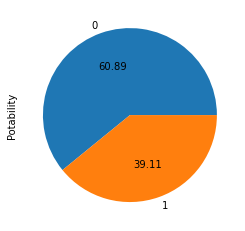

In [429]:
# volvemos a revisar el balance del dataset

data_clean['Potability'].value_counts().plot.pie(autopct='%.2f')

# Variables de Entrada

Ahora si vamos analisar cada variable en funcion de los limites permisibles.

# PH

Text(0.5, 1.0, 'PH potable')

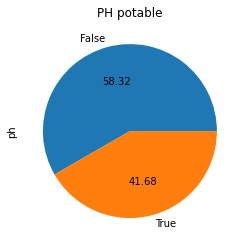

In [405]:
ph_potablae = (df['ph'] >= 6.5) & (df['ph'] <= 8.5) # verifico la cantidad de muestras que cumplen con el ph establecido
ph_potable.value_counts().plot.pie(autopct='%.2f')
plt.title('PH potable')

In [406]:
# El porsentage de cumplimiento parece coherente con los resultados de potabilidad.

Text(0.5, 1.0, 'PH potable')

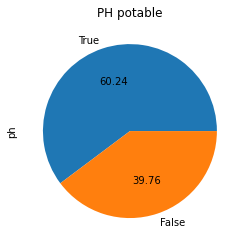

In [407]:
#volvemos a verificar sobre la muestra sin outliers 

ph_potable = (data_clean['ph'] >= 6.5) & (data_clean['ph'] <= 8.5) 
ph_potable.value_counts().plot.pie(autopct='%.2f')
plt.title('PH potable')

## Solid (Solidos)

Text(0.5, 1.0, 'Muestras solidos por debajo del limite')

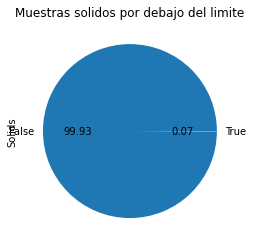

In [408]:
solid_max = (data_clean['Solids'] <= 1000) # verifico la cantidad de muestras que cumplen con el limite maximo de solidos
solid_max.value_counts().plot.pie(autopct='%.2f')
plt.title('Muestras solidos por debajo del limite')

In [409]:
# Casi no hay registros que cumplen esta condicion.
# Mas adelante la indagaremos en comparacion de las muestras clasificadas.

## Cloraminas

Text(0.5, 1.0, 'Muestras por debajo del limite')

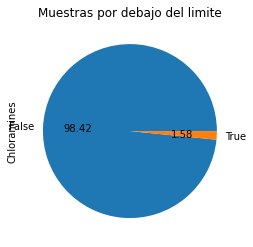

In [410]:
Chloramines = (data_clean['Chloramines'] <= 4) # verifico la cantidad de muestras que cumplen con el limite de 4 mg/L
Chloramines.value_counts().plot.pie(autopct='%.2f')
plt.title('Muestras por debajo del limite')

In [411]:
# Nuevamente muy pocos registros cumplen con la conicion.  

# Sulfate

Text(0.5, 1.0, 'Muestras por debajo del limite')

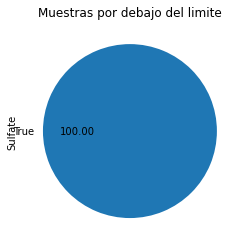

In [412]:
Sulfate = (data_clean['Sulfate'] <= 500) # verifico la cantidad de muestras que cumplen con el limite de 500 mg/L
Sulfate.value_counts().plot.pie(autopct='%.2f')
plt.title('Muestras por debajo del limite')

# Conductivity

Text(0.5, 1.0, 'Conductividad optima')

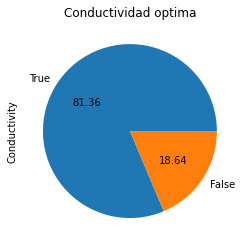

In [413]:
Conductivity = (data_clean['Conductivity'] >= 50) & (data_clean['Conductivity'] <= 500) # verifico la cantidad de muestras que cumplen con la conductividad optima
Conductivity.value_counts().plot.pie(autopct='%.2f')
plt.title('Conductividad optima')

# Trihalomethanes 

Text(0.5, 1.0, 'Muestras por debajo del limite')

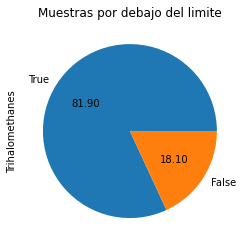

In [414]:
Trihalomethanes = (data_clean['Trihalomethanes'] <= 80) # verifico la cantidad de muestras que cumplen con el limite de 80
Trihalomethanes.value_counts().plot.pie(autopct='%.2f')
plt.title('Muestras por debajo del limite')

# Trihalomethanes

Text(0.5, 1.0, 'Muestras por debajo del limite')

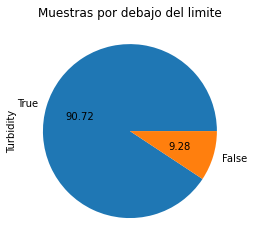

In [415]:
Turbidity = (data_clean['Turbidity'] <= 5) # verifico la cantidad de muestras que cumplen con el limite de 5
Turbidity.value_counts().plot.pie(autopct='%.2f')
plt.title('Muestras por debajo del limite')

## Conclusiones del analisis univariado

Los solidos y las cloraminas en el dataset no parecen estar ajustados a los limites de permisibilidad estudiados, esto puede deberse a que se estén utilizando unidades de medidas distintas, que a la fecha de clasificación de este dataset los limites fueran distintos o bien a que los registros no sean realmente confiables.   

El resto de las propiedades indagadas no contradicen por si mismas los resultados de potabilidad. A continuación habrá que estudiar cada variable en función a dichos resultados en el analisis bivariado.


# Analisis Bivariado

<Figure size 720x480 with 0 Axes>

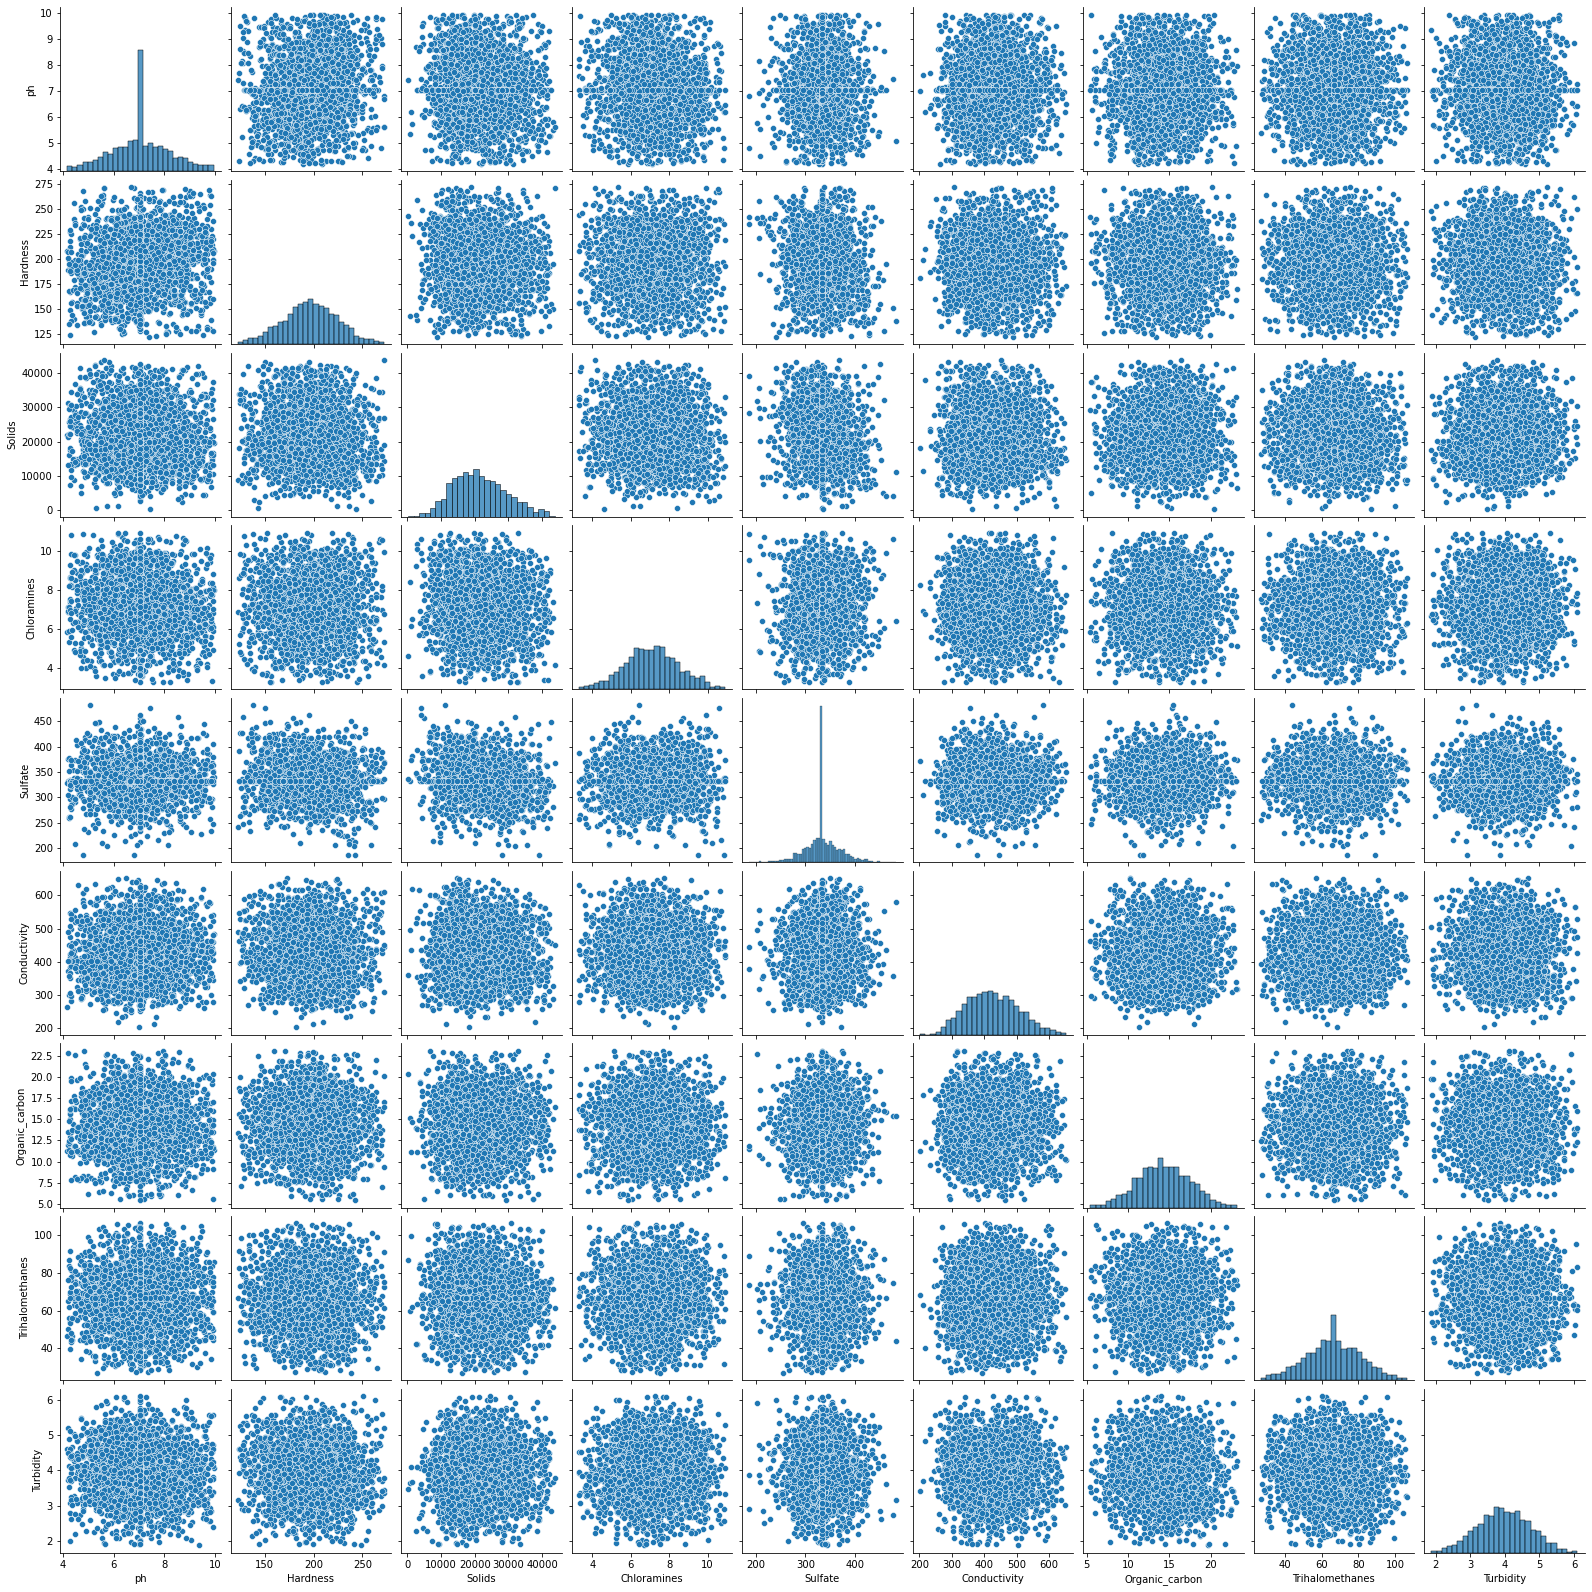

In [416]:
#vomos a empezar buscando correlaciones graficamente con un Pairplot
x_data = data_clean.drop("Potability", axis=1)
plt.figure(dpi=120)
sns.pairplot(x_data)
plt.show()

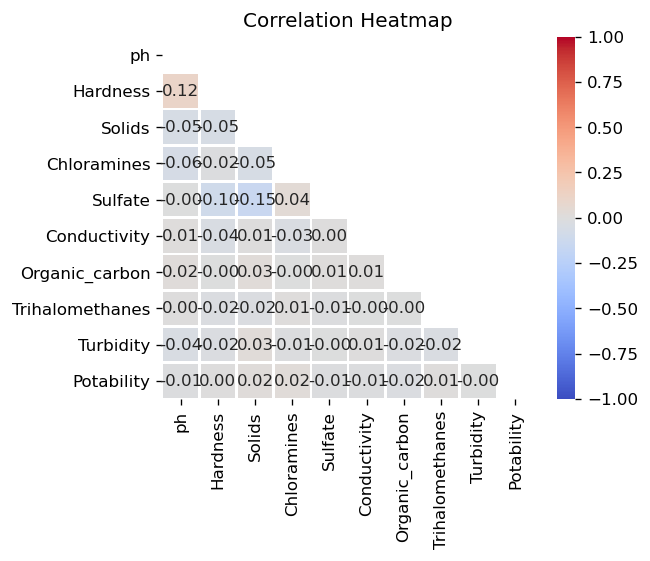

In [417]:
# No se observan correlaciones. 

#grafico explicitamente las correlaciones con un heatmap
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(data_clean.corr(),dtype = bool))
sns.heatmap(data_clean.corr(),mask = mask, fmt = ".2f",vmin = -1, vmax = +1, annot = True, lw=1,cmap = 'coolwarm')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [418]:
# Ahora vamos a indagar las diferencias entre el agua portable y la no potable. 

Potable = x_data[data_clean['Potability'] == 1]
No_potable = x_data[data_clean['Potability'] == 0]

comp = pd.DataFrame({'min_potable': Potable.min(), 'mean_potable':Potable.mean(), 'max_potable':Potable.max(), 'min_no_potable':No_potable.min(),'mean_no_potable':No_potable.mean(), 'max_no_potable':No_potable.max()})
comp

min_potable  mean_potable   max_potable  min_no_potable  \
ph                  4.187491      7.041910      9.917092        4.197584   
Hardness          124.007350    196.796282    272.111698      122.541040   
Solids            728.750830  21735.816327  43680.222521      320.942611   
Chloramines         3.308977      7.160607     10.886742        3.296157   
Sulfate           187.170714    333.489657    481.030642      203.444521   
Conductivity      201.619737    424.321789    649.805765      210.319182   
Organic_carbon      5.426650     14.211555     22.641598        5.537059   
Trihalomethanes    27.663174     66.601523    106.037222       27.095703   
Turbidity           1.917754      3.964830      6.083772        1.872573   

                 mean_no_potable  max_no_potable  
ph                      7.068129        9.927024  
Hardness              196.577758      270.209549  
Solids              21355.368846    43195.473668  
Chloramines             7.090076       10.908687  
Sulfate               334.214874      458.441072  
Conductivity          426.540296      652.537592  
Organic_carbon         14.357505       23.135952  
Trihalomethanes        66.292770      106.371720  
Turbidity               3.971746        6.099632

Parece que el agua clasificada como potable no respeta de los limites estudiados y que sus valores medios son muy semejantes a los del agua no potable.

El siguiente grafico muesta los valores maximos de cada variable del agua potable en relacion a los maximos de la muestra total.

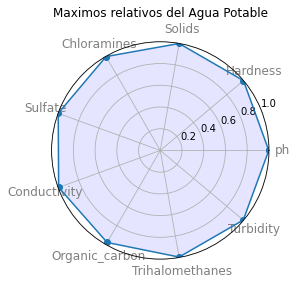

In [419]:

# Set data
df_radar = pd.DataFrame( {'group':x_data.columns, 'val':Potable.max().values/x_data.max().values })

#df = pd.concat([df,Potable.max()])

#print(df)
 
fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")


theta = np.arange(len(df_radar) + 1) / float(len(df_radar)) * 2 * np.pi
values = df_radar['val'].values
values = np.append(values, values[0])

l1, = ax.plot(theta, values, color="C0", marker="o")
plt.xticks(theta[:-1], df_radar['group'], color='grey', size=12)
ax.fill(theta, values, 'blue', alpha=0.1)

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Maximos relativos del Agua Potable")
plt.show()

Este grafico deberia mostrar lo limites permisibles del agua potable pero por lo contrario muestra que hay agua clasificada como potable en todos los extremos superiores.

<AxesSubplot:xlabel='Potability', ylabel='ph'>

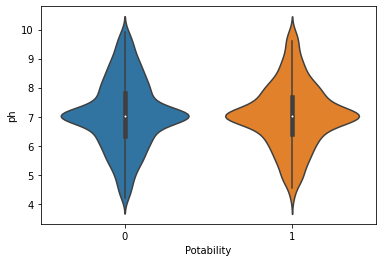

In [420]:
# graficamos el ph en funcion de la potabilidad

sns.violinplot(y="ph", x="Potability", data=data_clean)

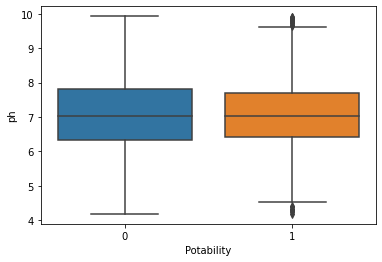

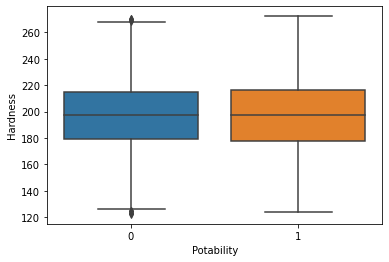

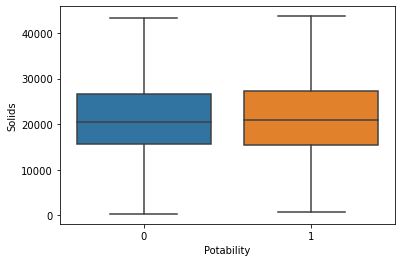

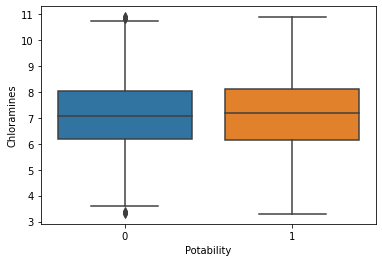

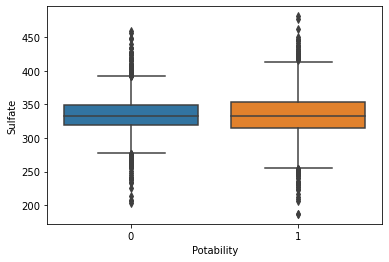

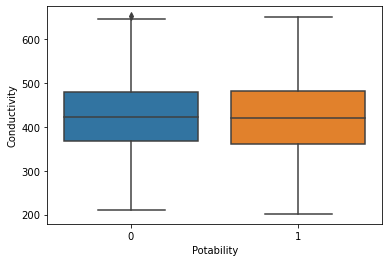

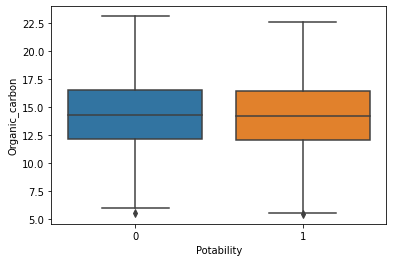

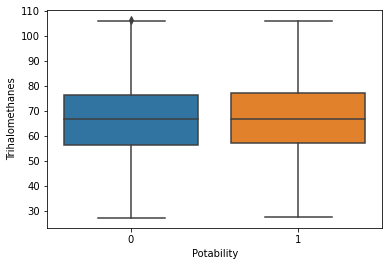

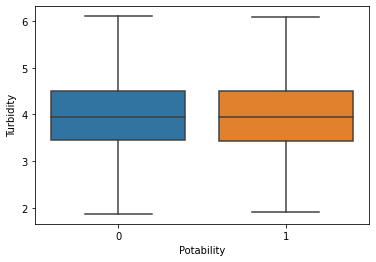

In [421]:
# graficamos el resto de las variables

for column in x_data:
    sns.boxplot(y=column, x="Potability", data=data_clean)
    plt.show()

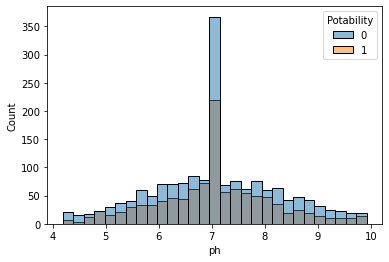

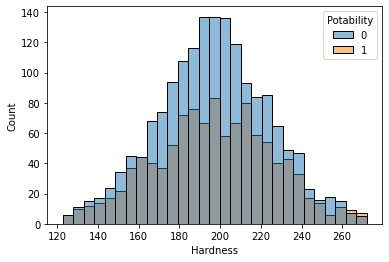

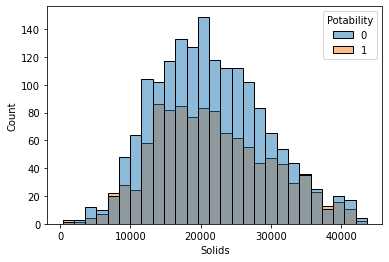

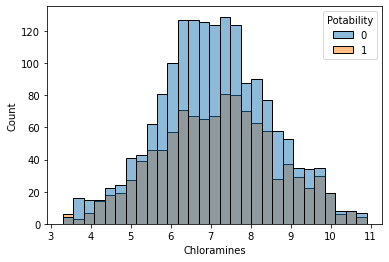

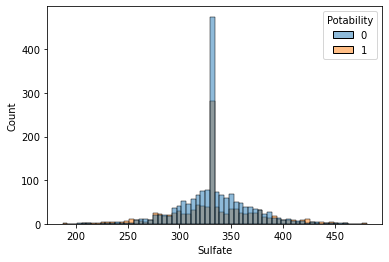

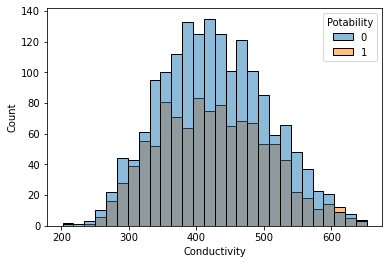

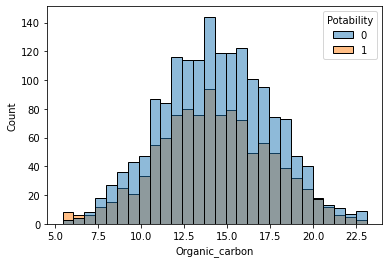

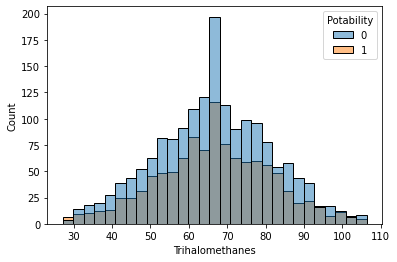

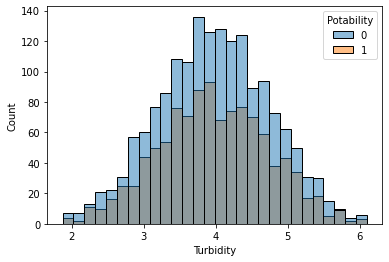

In [422]:
for column in x_data:
    sns.histplot(x=column, hue="Potability", data=data_clean)
    plt.show()


## Conclusiones del analisis Bivariado

Teniendo en cuenta el desbalanceo de las muestras potables y no potables, se observan distribuciones de frecuencias y rangos similares. No se observan los patrones esperados en relacion a los limites permisibles estudiados para cada variable.

Pareceria que la clasificacion del dataset se hizo de manera aleatoria. No obstante, vamos a continuar con el analisis multivariado para luego intentar crear un modelo capaz de predecir esta clasificación. 

# Analisis Multivariado

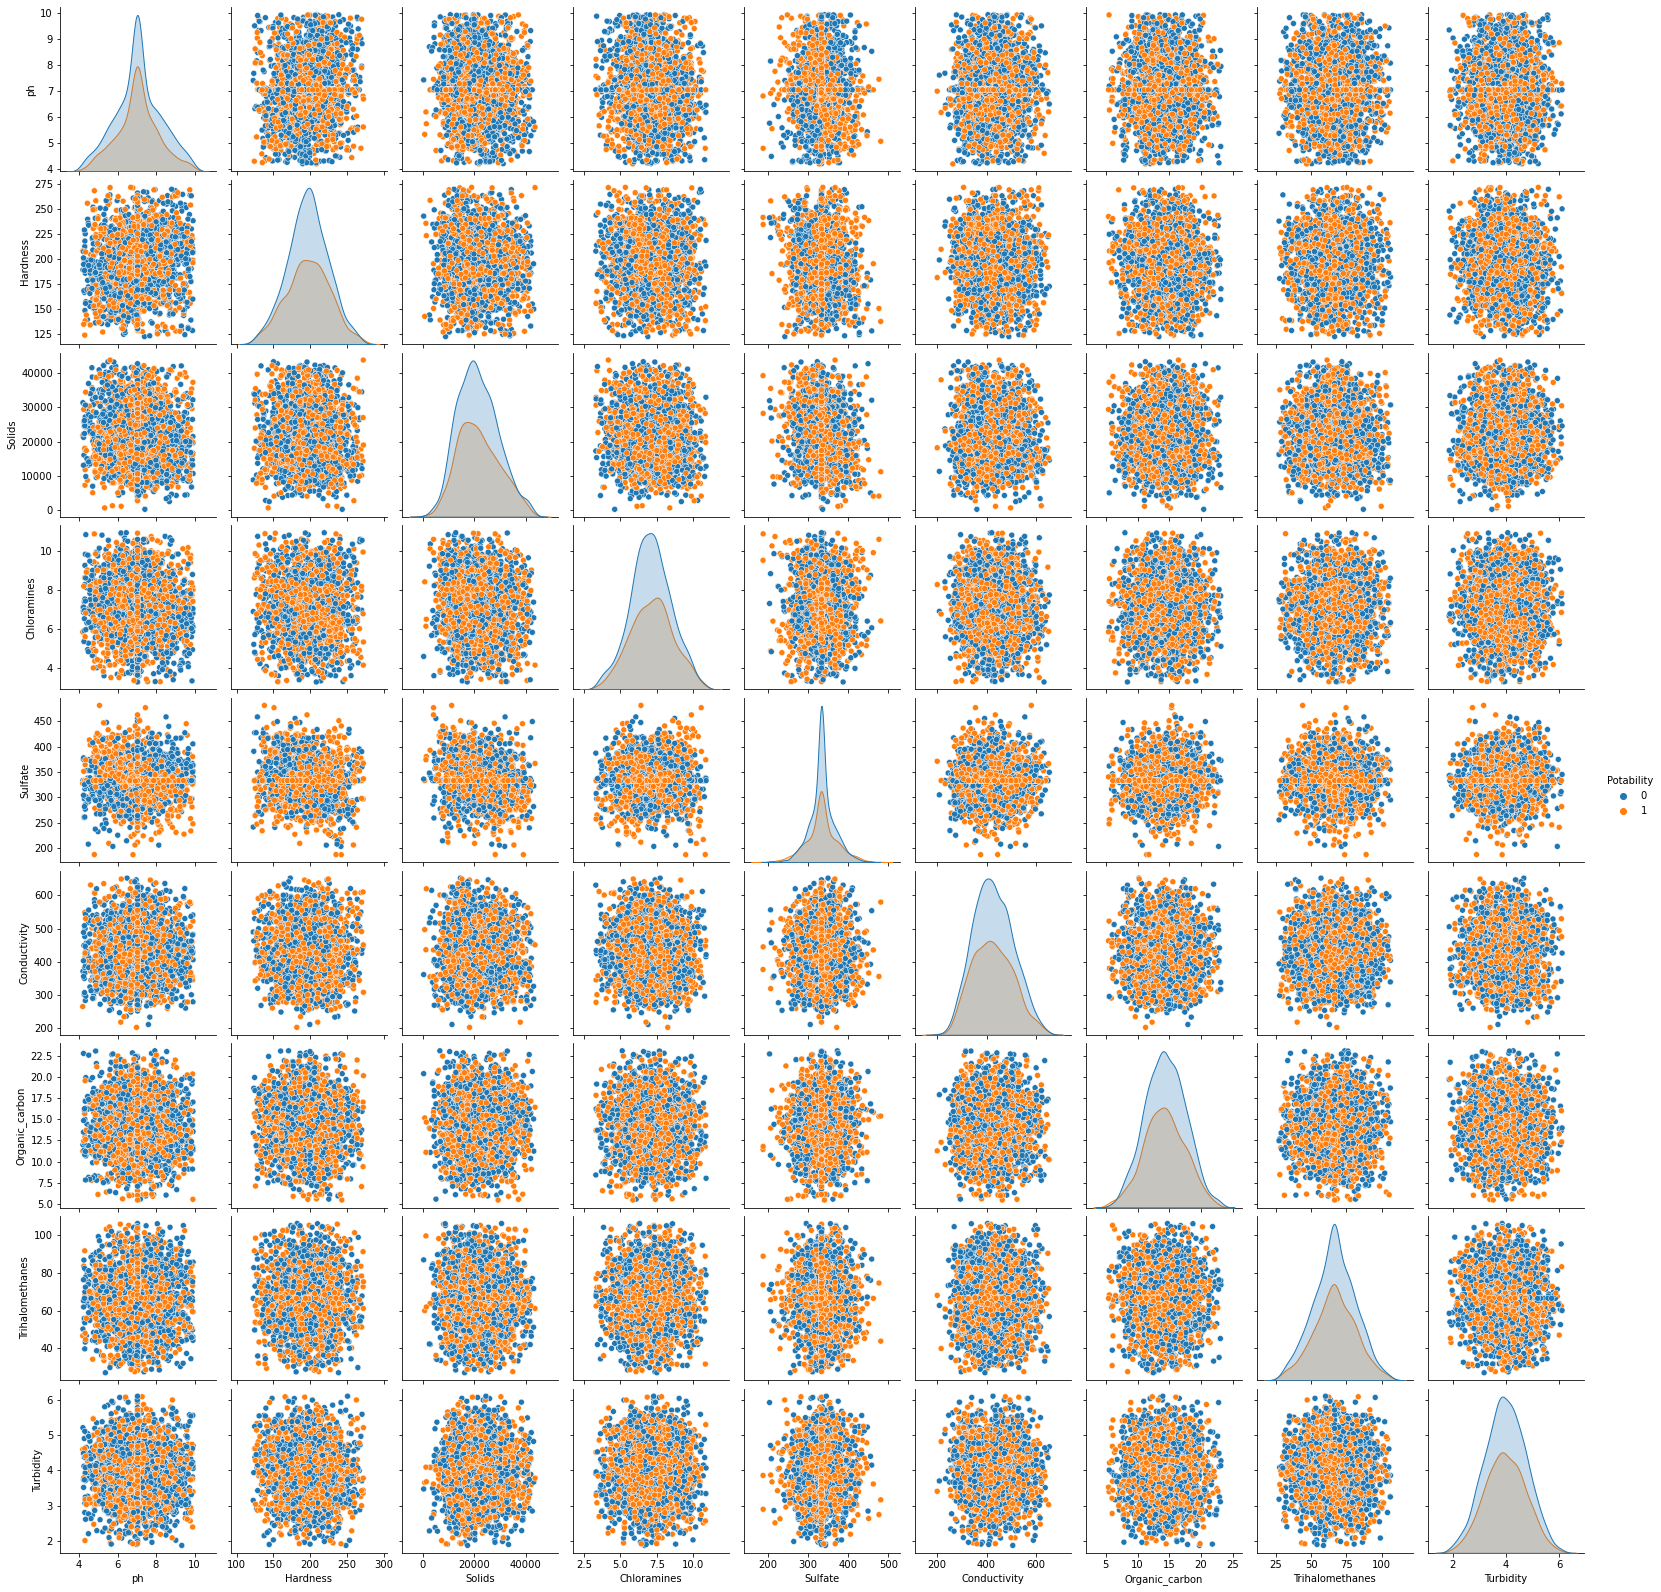

In [423]:
#buscamos correlaciones de dos variable con respecto a la potabilidad 
sns.pairplot(data_clean, hue='Potability')


<AxesSubplot:xlabel='ph', ylabel='Sulfate'>

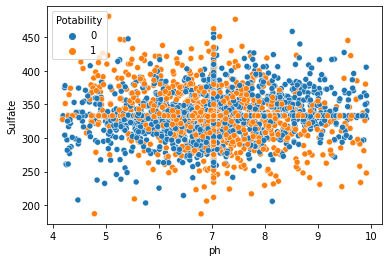

In [424]:
#ampliamos el grafico del ph y el sulfato
sns.scatterplot(data = data_clean, x = "ph",y = "Sulfate",hue="Potability")

<AxesSubplot:xlabel='ph', ylabel='Sulfate'>

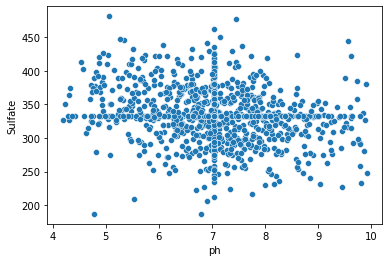

In [425]:
# aislo solo las muestras potables
sns.scatterplot(data = data_clean[data_clean['Potability'] == 1], x = "ph",y = "Sulfate")

In [426]:
# Pareceria haber una leve correlacion negativa entre el sulfato y el ph para el agua potable

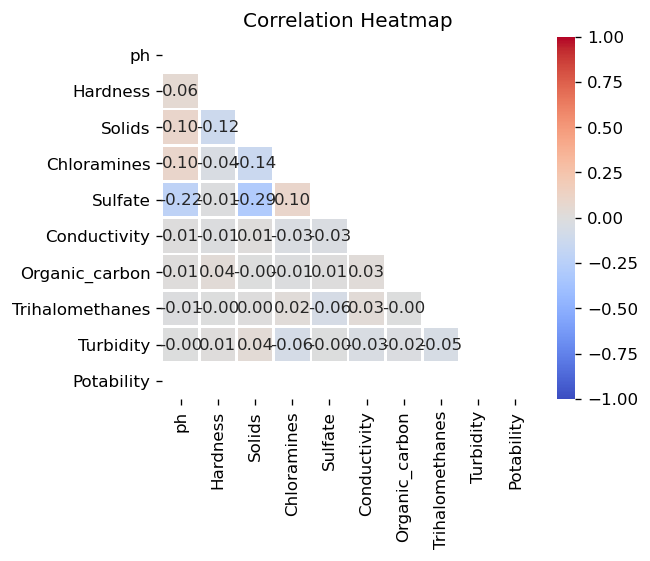

In [427]:
#buscamos correlaciones para el agua potable

plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(data_clean.corr(),dtype = bool))
sns.heatmap(data_clean[data_clean['Potability'] == 1].corr(),mask = mask, fmt = ".2f",vmin = -1, vmax = +1, annot = True, lw=1,cmap = 'coolwarm')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

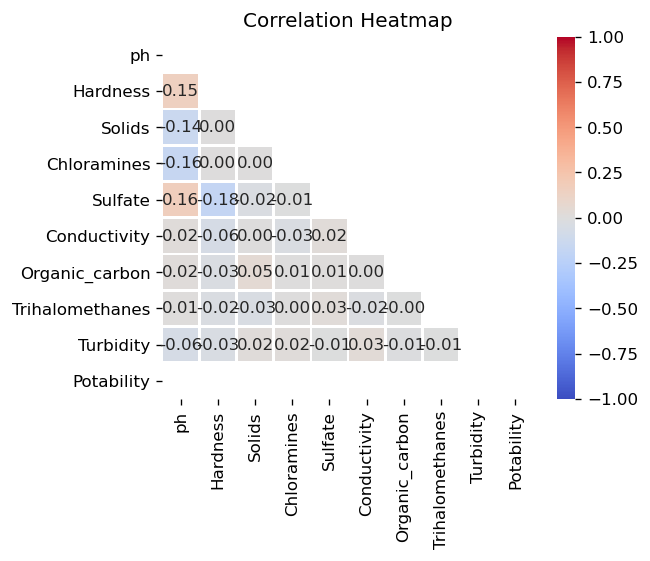

In [428]:
#Efectivamente hay una correlacion negativa debil entre el ph y el sulfato.
# Ademas enncontramos una correlacion negativa entre el solfato y los solidos

#buscamos correlaciones para el agua no potable

plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(data_clean.corr(),dtype = bool))
sns.heatmap(data_clean[data_clean['Potability'] == 0].corr(),mask = mask, fmt = ".2f",vmin = -1, vmax = +1, annot = True, lw=1,cmap = 'coolwarm')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

En el agua no potable tambien aparecen algunas correlaciones debiles pero contrarias a las del agua potable. Se observa una correlacion positiva entre el ph y el sulfato y una negativa entre el ph y los solidos. 

Ademas aparecen algunas correlaciones del ph y el sulfato con la dureza.


## Conclusiones

En el analisis multivariado encontramos por primera vez algunas correlaciones que pese a ser debiles o muy debiles diferencian el grupo de agua potable de la no potable. 